# Exploratory Data Analysis 1 Project

### Turning Data Into Insights

This project inspects Netflix's library to expose patterns in content type, genres, countries, and release trends—transforming raw data into meaningful information through exploratory data analysis.

##### This Project Will Cover

* What genres are most common in movies vs TV shows
* How has the addition of new content evolved over time
* Which countries dominate certain genres
* Patterns in ratings based of the content type
* “The global reach of Netflix”
* “Netflix through the years”
* “Is Netflix family-friendly?”

This analysis explores the rich landscape of content available on Netflix, one of the world's leading streaming entertainment services. The dataset contains detailed information about movies and TV shows in the Netflix catalog, allowing us to uncover patterns and insights about content distribution, genres, ratings, and more.

##### Dataset Overview
> The analysis uses a comprehensive dataset of Netflix movies and TV shows that includes:

* Content types (Movies vs. TV Shows)
* Titles and descriptions
* Release years
* Content ratings (TV-MA, PG-13, etc.)
* Duration (minutes for movies, seasons for TV shows)
* Genres/categories
* Cast and director information
* Country of origin
* Date added to Netflix

##### Project Objectives
*This exploratory data analysis aims to:*

1. *Understand content distribution:* Analyze the balance between movies and TV shows, and how this has evolved over time
2. *Explore content ratings:* Investigate the distribution of ratings across different genres and content types
3. *Analyze genre preferences:* Identify the most common genres and their characteristics
4. *Examine regional content strategies:* Explore how content varies by country of origin
5. *Investigate temporal patterns:* Analyze when content is added to Netflix and release year trends

*GitHub:* https://github.com/imelinc

#### --- IMPORTING LIBRARIES ---

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### --- LOAD THE DATASET ---

In [106]:
df = pd.read_csv("data/netflix_titles.csv")

In [107]:
# Let's get a look of the dataset
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


As we can see, there are multiple rows and columns which would be very handy for our exploratory data analysis in the future, now let's see what is with the *MISSING DATA*

#### --- MISSING DATA ---

In [108]:
# First we get the info of the dataframe to see how many and what kind of data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


So we have 8807 rows with some missing values as we can see, let's find out how many on each column

In [109]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

So there's how many values are missing for each column, we can see that none of them excedes the 80% of the total (8807), so it's not viable to drop them. 
The best way to get rid of this missing values will be to fill them with something, maybe with the word `"Unknown"`, let's get to it...

In [110]:
# Filling the missing values with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

Once we've done this, let's see our dataframe now and let's check if there're missing values still

In [111]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [112]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Well now that we managed the missing values problem we can get to work with the project itself

# --- GENRE DISTRIBUTION --- 

> In this section, we explore how different genres are distributed across Netflix's movies and TV shows. This analysis reveals Netflix's content priorities and provides insights into audience preferences.  
The visualizations below compare the most popular genres in movies versus TV shows, highlighting significant differences in content strategy between these formats.
By understanding these genre patterns, we gain valuable perspective on Netflix's ability to diverse viewer interests.

In [113]:
# Filter the DataFrame for movies only
movies_df = df[df['type'] == 'Movie'].copy()
# Filter the dataframe for tv shows only
tv_shows_df = df[df['type'] == 'TV Show'].copy()

First we're gonna make some functions that will help not only for this section, but for upcoming ones

In [114]:
def expand_dataframe(df, column):
    """
    This function expands the dataframe in multiple rows given a certain column
    Args:
        df (pandas.DataFrame): dataset
        column (str): name of the column we want to expand
    """
    # Divide the column into multiple rows
    df.loc[:, column] = df[column].str.split(",")
    df_exploded = df.explode(column)
    df_exploded[column] = df_exploded[column].str.strip() 
    
    return df_exploded

This function divides a certain column in multiple rows because we need to separate the genres (listed_in) column, which now looks like this

In [115]:
df["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

As we can see, there are multiple values in a single column, so we have to expand it

In [116]:
def get_count(df, column):
    """
    This function count the amount of values that are on the dataframe given a certain column
    Args:
        df (pandas.DataFrame): dataset
        column (str): name of the column that we want to count values
    """
    # Expand the dataframe
    new_df = expand_dataframe(df, column)
    # Count the number of ocurrences of each genre
    df_genre_counts = new_df[column].value_counts()
    
    return df_genre_counts

And this function uses the last one to expand i case we need it and then counts the different values in each column, something we need to do in this case

In [117]:
movies_genre_counts = get_count(movies_df, "listed_in")
tv_shows_genre_counts = get_count(tv_shows_df, "listed_in")

Now, lets take a look at this new variables

In [118]:
movies_genre_counts

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: count, dtype: int64

In [119]:
tv_shows_genre_counts

listed_in
International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: count, dtype: int64

Ok so now we have all the data we need to make a plot of each distribution of genres.  
We're going to make a barplot, but first we're going to make a function that helps us both now and for future barplots.

In [120]:
def make_barplot(file, plot_title, xlabel, ylabel, ax, kind, need_custom_axes = False):
    """
    This function makes a barplot usign different parameters to fit it to our needs
    Args:
        file (pandas.DataFrame): File we want to plot
        plot_title (str): Title of the barplot
        xlabel (str): Label to identify the x axis
        ylabel (str): Label to identify the y axis
        ax (matplotlib.axes.Axes): Where we're gonna plot the data
        kind (str): Kind of barplot ("bar" or "barh")
        need_custom_axes (bool, optional): This variable help us to set a custom x or y label. Defaults to False.
    """
    if not need_custom_axes:
        file.plot(kind=kind , ax=ax, color="#7F1A1A", legend = False)
    else:
        file.plot(kind = kind, x = (file.columns.to_list())[0], y = (file.columns.to_list())[1], ax = ax, color = "#7F1A1A", legend = False)
    if kind == "barh":
       ax.invert_yaxis()
       ax.grid(True, axis='x', color='white', alpha=0.4)
    else:
       ax.grid(True, axis='y', color='white', alpha=0.4)
    ax.set_facecolor("#15130d")
    ax.set_title(plot_title, color = "white", fontsize = 20)
    ax.set_xlabel(xlabel, color = "white", fontsize = 12)
    ax.set_ylabel(ylabel, color = "white", fontsize = 12)
    ax.tick_params(colors = "white")
    for spine in ax.spines.values():
        spine.set_color("white")

Now, we are ready to plot

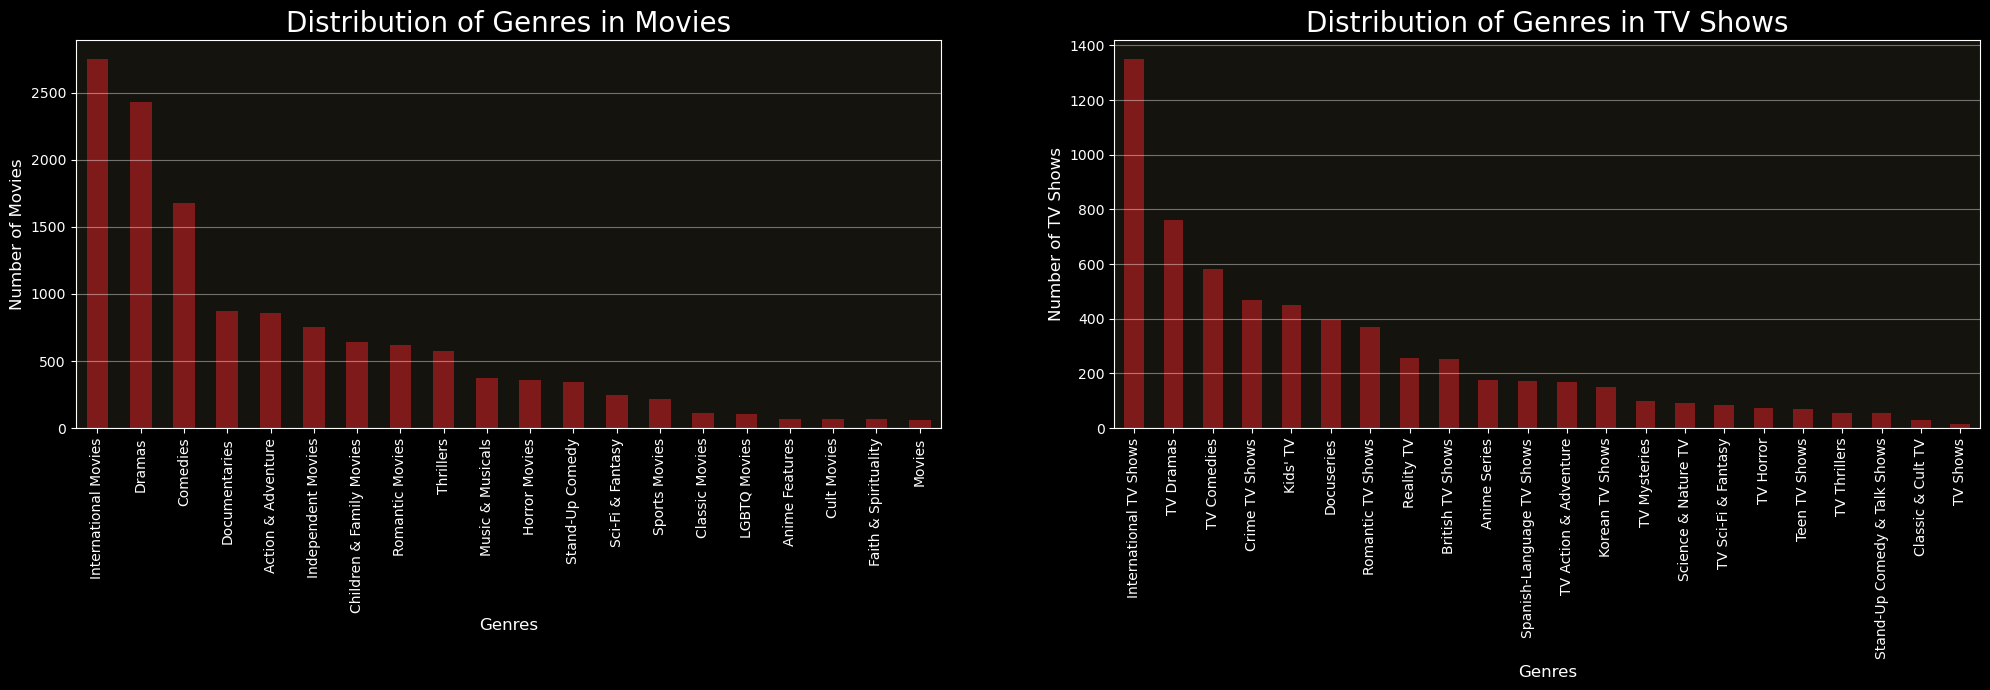

In [121]:
# Plotting the data
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                ncols = 2,
                                figsize = (20, 7),
                                facecolor = "#000000")

make_barplot(movies_genre_counts,"Distribution of Genres in Movies", "Genres", "Number of Movies", ax1, "bar")
make_barplot(tv_shows_genre_counts, "Distribution of Genres in TV Shows", "Genres", "Number of TV Shows", ax2, "bar")

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

### --- INSIGHTS ---

* ##### Movies

The most dominant genre in Netflix’s movies are `“International Movies”` and `“Dramas”`, this indicates us that people from different parts of the world use Netflix and people tend to be pretty emotional when it comes to choose a movie to watch.
However,  `“Comedy”` and `“Documentaries”` also show strong presence, indicating diverse viewer interests beyond mainstream content.
Talking about low presence we have `“Faith & Spirituality”` and `“Cult Movies”` suggesting either limited production in these categories or lower viewer demand on Netflix.

* ##### TV Shows

Netflix TV shows are heavily concentrated in genres like `“International”`, `“Dramas”`, and `“Comedies”`, indicating a focus on globally appealing content (the most popular movies genres are similar). Meanwhile, genres like `“Science & Nature”` or `“Classic & Cult”` are less common, pointing to niche audience with limited but specific content offerings.

--------------------

*Netflix's* content reflects a strategy focused on appealing genres with international and emotional resonance (`"International Movies"`, `"Dramas"`, and `"Comedies"` showing strong presence in both movies and TV), while also accommodating diverse, but less dominant viewer interests with genres like `"Documentaries"` in movies. The lower representation of niche categories suggests a prioritization of higher-demand content and potentially limited production in those areas across both movies and TV shows.

-----

# --- Addition of Content Over Time ---

> This section explores how Netflix has expanded its content library over time. By analyzing when movies and TV shows were added to the platform, we can identify key growth periods and strategic shifts in Netflix's content acquisition approach.  
The analysis tracks the yearly addition patterns for both movies and TV shows, revealing important trends in how Netflix has built its catalog. 

In [122]:
# Let's take a look at the "date_added" column 
df.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

We are in the same situation as before, where we have to take just the years in this case.

In [123]:
# Divide into movies and tv shows
movies_df = df[df["type"] == "Movie"].copy()
tv_shows_df = df[df["type"] == "TV Show"].copy()

# Getting the years of addition of each movie
movies_df["date_added"] = movies_df["date_added"].str.split(", ")
year_movies = movies_df["date_added"].str[1] # 1 because it's the second element
    
# Getting the years of addition of each tv show
tv_shows_df["date_added"] = tv_shows_df["date_added"].str.split(", ")
year_tv_shows = tv_shows_df["date_added"].str[1] # 1 because it's the second element

In [124]:
# Let's take a look at the different years
year_movies, year_tv_shows

(0       2021
 6       2021
 7       2021
 9       2021
 12      2021
         ... 
 8801    2016
 8802    2019
 8804    2019
 8805    2020
 8806    2019
 Name: date_added, Length: 6131, dtype: object,
 1       2021
 2       2021
 3       2021
 4       2021
 5       2021
         ... 
 8795    2018
 8796    2017
 8797    2018
 8800    2016
 8803    2019
 Name: date_added, Length: 2676, dtype: object)

In [125]:
# Now, let'c count the numbeer of ocurrences of each type (movie or tv show)
num_movies = year_movies.value_counts()
num_tv_shows = year_tv_shows.value_counts()

Now we should turn both of them into a dataframe so its easier for us to plot

In [126]:
df_movie_years = num_movies.reset_index()
df_movie_years.columns = ["year", "count"]
df_movie_years["year"] = df_movie_years["year"].astype(int).sort_values()
df_movie_years = df_movie_years.sort_values("year", ascending=False)
df_movie_years

,year,count
3,2021,993
1,2020,1284
0,2019,1424
2,2018,1237
4,2017,839
5,2016,253
6,2015,56
7,2014,19
9,2013,6
10,2012,3


In [127]:
df_shows_years = num_tv_shows.reset_index()
df_shows_years.columns = ["year", "count"]
df_shows_years["year"] = df_shows_years["year"].astype(int)
df_shows_years = df_shows_years.sort_values("year", ascending=False)
df_shows_years

,year,count
2,2021,505
0,2020,595
1,2019,592
3,2018,412
4,2017,349
5,2016,176
6,2015,26
7,2014,5
8,2013,5
9,2008,1


Perfect! Now that we have this, we have all the data we need to make a plot, maybe a distribution one!

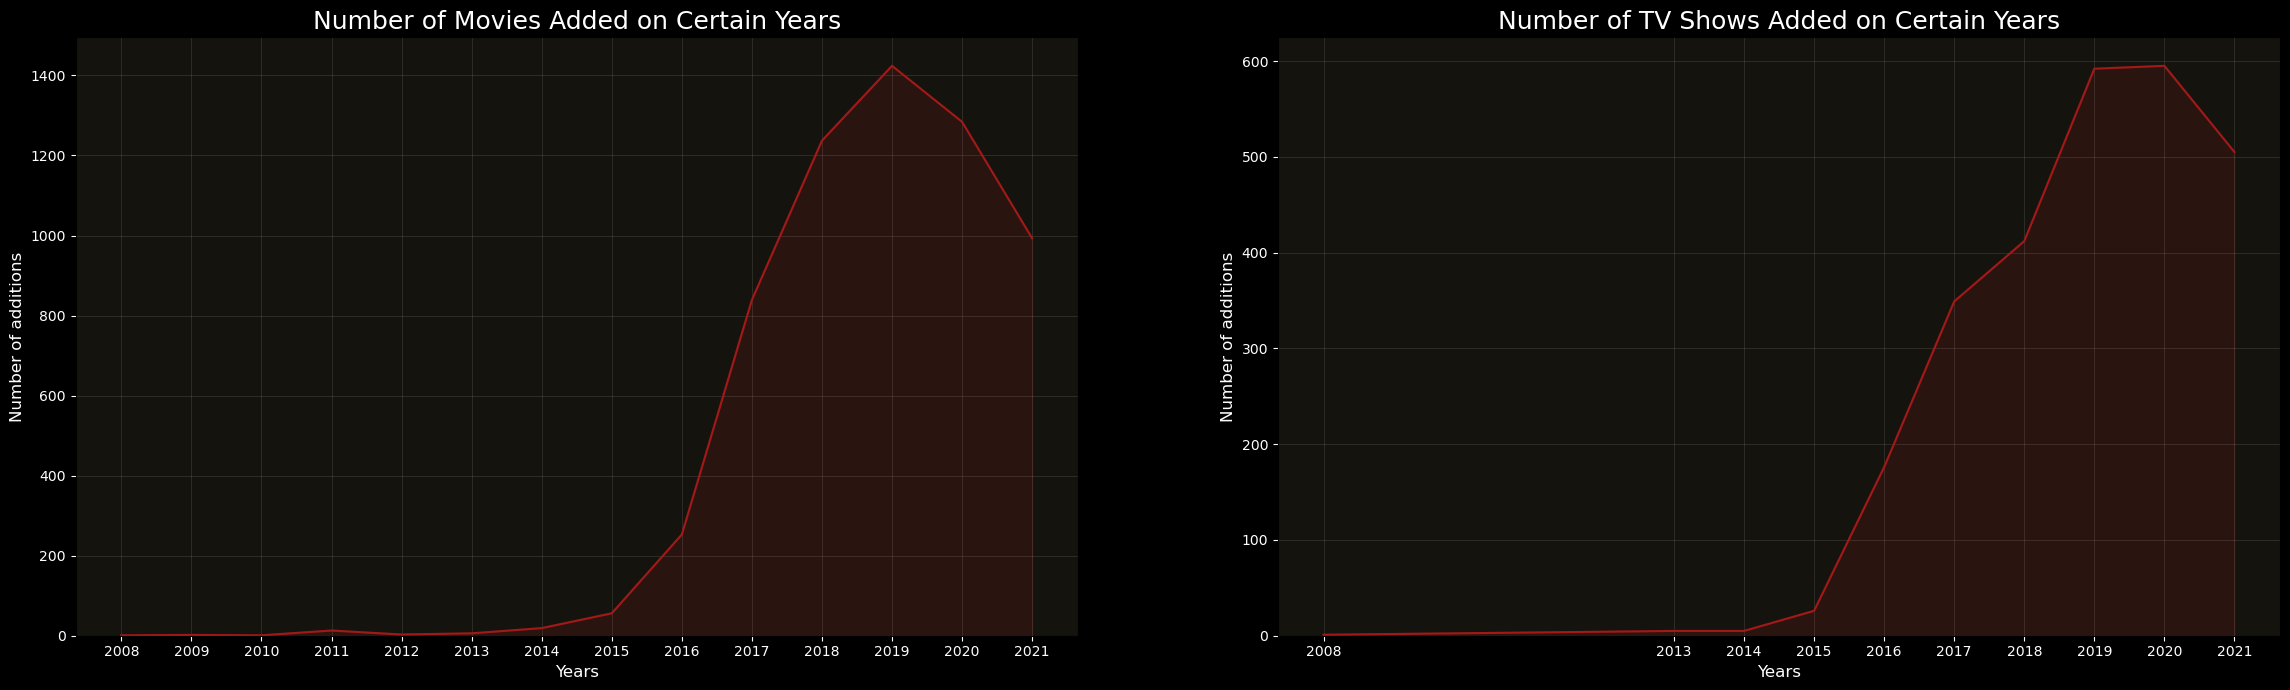

In [128]:
fig, (ax1,ax2) = plt.subplots(ncols=2,
                              nrows= 1,
                              figsize=(23,7),
                              facecolor = "#000000")

# Now we plot the data
df_movie_years.plot(x="year", y="count", ax=ax1, color="#7F1A1A", kind="area", legend=False, alpha = 0.2)
df_movie_years.plot(x="year", y="count", ax=ax1, color="#A11919", kind="line", legend=False)
ax1.set_title("Number of Movies Added on Certain Years", fontsize = 18, color="white")
ax1.set_xlabel("Years", fontsize = 12, color = "white")
ax1.set_xticks(df_movie_years["year"])
ax1.set_ylabel("Number of additions", fontsize = 12, color= "white")
ax1.set_facecolor("#15130d")
ax1.tick_params(colors="white")
ax1.grid(True, color="white", alpha = 0.1)

df_shows_years.plot(x="year", y="count", ax=ax2, color="#7F1A1A", kind="area", legend=False, alpha = 0.2)
df_shows_years.plot(x="year", y="count", ax=ax2, color="#A11919", kind="line", legend=False)
ax2.set_title("Number of TV Shows Added on Certain Years", fontsize = 18, color="white")
ax2.set_xlabel("Years", fontsize = 12, color = "white")
ax2.set_ylabel("Number of additions", fontsize = 12, color="white")
ax2.set_xticks(df_shows_years["year"])
ax2.set_facecolor("#15130d")
ax2.tick_params(colors="white")
ax2.grid(True, color="white", alpha = 0.1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)

### --- INSIGHT ---

Both movies and TV shows saw a major surge in additions starting around 2014, peaking between 2018, 2019 and 2020. The increase suggests a period of aggressive expansion in content libraries, likely driven by growing demand and competition in the streaming industry.  

Notably, movies reached their highest addition count (around 1400) in 2019, followed by a slight decline. TV shows followed a similar trajectory, peaking at approximately 600 additions in 2019 and 2020.

The stabilization or slight reduction after these peaks could indicate a strategic shift, possibly focusing on content quality over quantity.

---

# --- Domination of Countries ---

Ever noticed how certain countries seem to be everywhere in movies and TV shows? Some nations have a huge presence in the entertainment industry, popping up again and again on our screens.

> In this section, we’re taking a visual approach (using pie charts) to break down which countries show up the most in movies and TV shows (separately). This should give us a clearer idea of which places dominate the scene, whether it’s because of industry size, global reach, or just plain cultural influence. 

First, we're going to take a quick look at the countries column of our dataframe

In [129]:
df["country"].head(20)

0                                         United States
1                                          South Africa
2                                               Unknown
3                                               Unknown
4                                                 India
5                                               Unknown
6                                               Unknown
7     United States, Ghana, Burkina Faso, United Kin...
8                                        United Kingdom
9                                         United States
10                                              Unknown
11                                              Unknown
12                              Germany, Czech Republic
13                                              Unknown
14                                              Unknown
15                                        United States
16                                              Unknown
17                                              

As we see, there're rows that contain multiple countries, so we have to fix that in order to count properly the amount of countries for each type

In [130]:
df = df.copy()
df['country'] = df['country'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('country').explode('listed_in')
df['country'] = df['country'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()

This way we get the countries expanded and also the genres, so we have all the data to plot

In [131]:
# first let get movies and TV shows separated as we always do
movies_df = df[df["type"] == "Movie"].copy()
tv_shows_df = df[df["type"] == "TV Show"].copy()

# Now we have to access the number of occurences of the top 10 countries 
# 1. For movies
# 2. For tv shows

# Movies
movies_top_ten = get_count(movies_df, "country") # We use the function that we created before and we pass the "country" column
movies_top_ten = movies_top_ten[movies_top_ten.index != "Unknown"].head(10) # we have to eliminate the unknown values so it doesn't show on the chart

# TV Shows (the same as movies but with the shows data)
tv_shows_top_ten = get_count(tv_shows_df, "country")
tv_shows_top_ten = tv_shows_top_ten[tv_shows_top_ten.index != "Unknown"].head(10)

In [132]:
movies_top_ten, tv_shows_top_ten

(country
 United States     5019
 India             2606
 United Kingdom    1069
 France             726
 Canada             633
 Spain              416
 Germany            402
 Japan              294
 China              259
 Egypt              256
 Name: count, dtype: int64,
 country
 United States     1761
 United Kingdom     714
 South Korea        482
 Japan              439
 Canada             244
 Taiwan             200
 India              198
 France             190
 Spain              175
 Mexico             164
 Name: count, dtype: int64)

Now that we got this, we are ready to plot the pie

In [133]:
# First let"s make a set of colors to apply top the chart
colors = ["#7F1A1A", "#A35E2D", "#625B7F", "#3F7F4A", "#4E4E4E", 
        "#947F4E", "#6C4A7F", "#377F79", "#9C3131", "#5A5A5A"]

# Then we have to turn the series into a datafram to make the plotting experience a little bit easier
top10_movies = movies_top_ten.reset_index()
top10_movies.columns = ["country", "count"]

top10_shows = tv_shows_top_ten.reset_index()
top10_shows.columns = ["country", "count"]

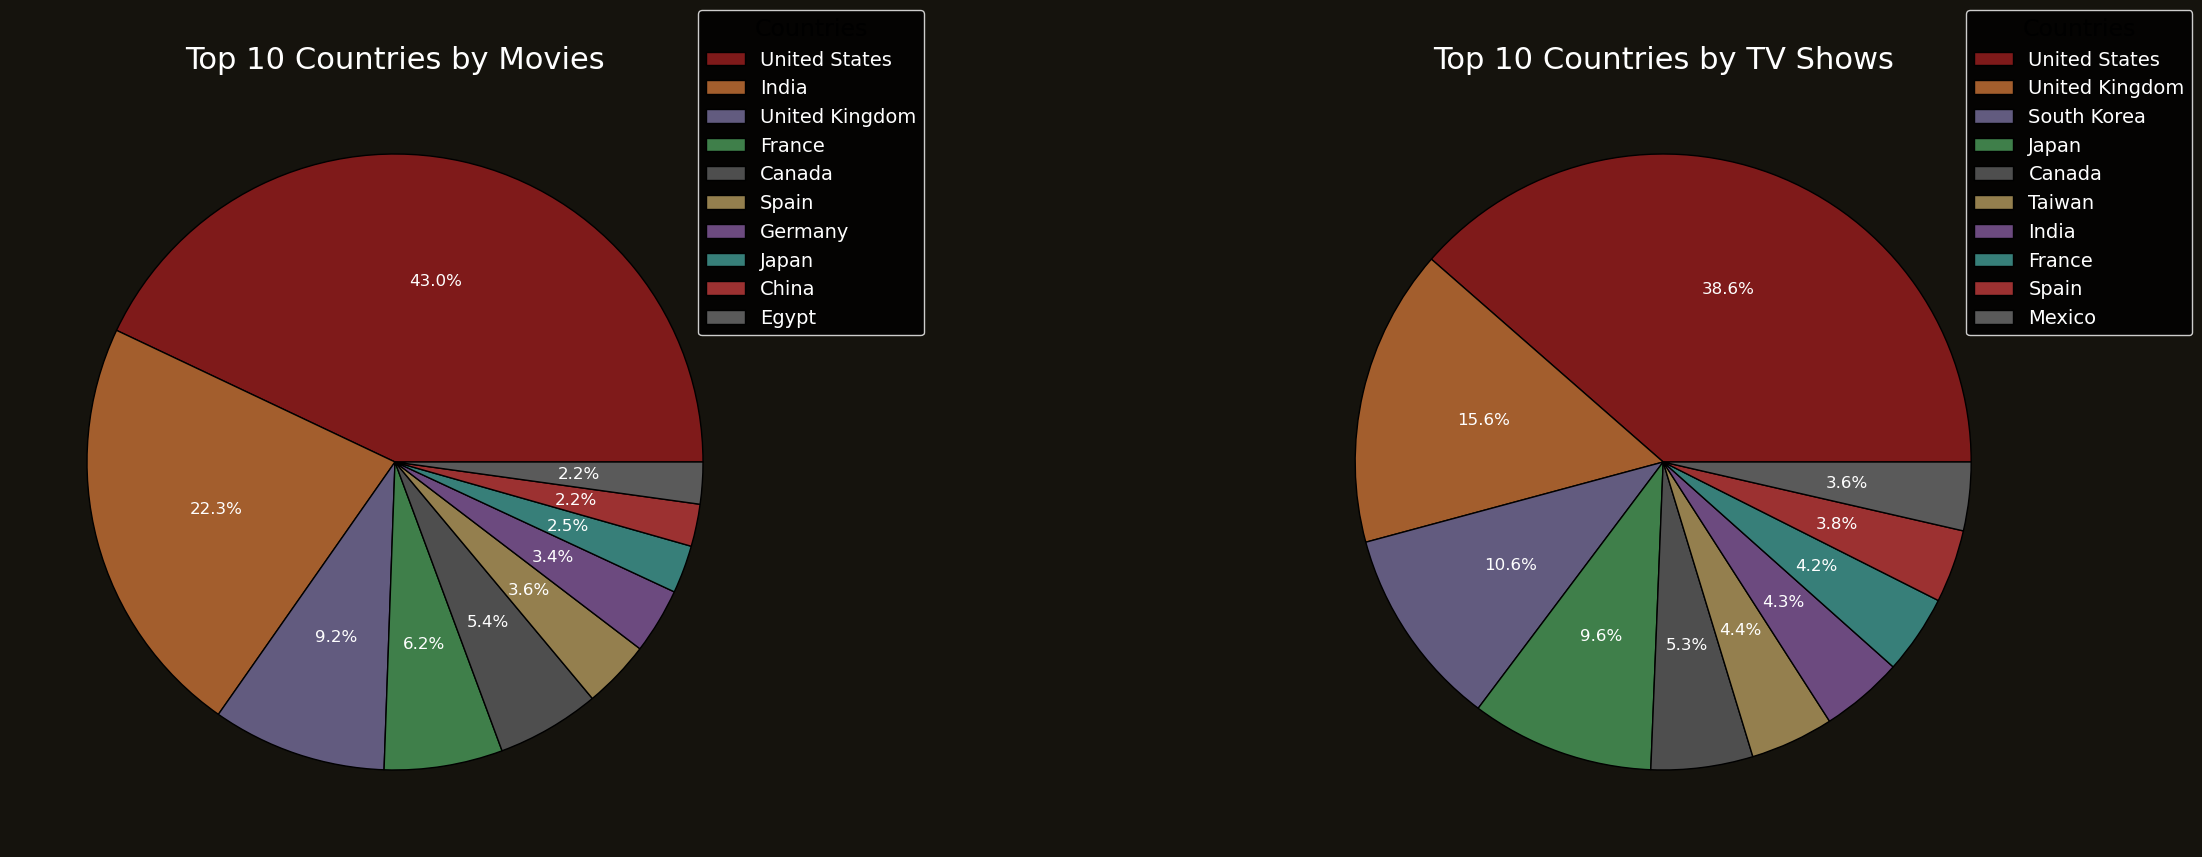

In [134]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(ncols= 2,
                               nrows= 1,
                               figsize = (30,10),
                               facecolor = '#15130d')

ax1.pie(top10_movies["count"].to_list(), labels= None, labeldistance=1.1, 
                colors=colors, wedgeprops={'edgecolor': 'black'}, autopct="%1.1f%%",
                textprops={"fontsize":12, "color":"white"})
ax1.set_title("Top 10 Countries by Movies", color="white", fontsize=22)
ax1.legend(top10_movies["country"], title="Countries", loc="upper right", bbox_to_anchor=(1.2, 1.1), 
           facecolor="black", edgecolor="white", title_fontsize=17, fontsize=14, 
           labelcolor="white")

ax2.pie(top10_shows["count"].to_list(), labels= None, labeldistance=1.1, 
                colors=colors, wedgeprops={'edgecolor': 'black'}, autopct="%1.1f%%",
                textprops={"fontsize":12, "color":"white"})
ax2.set_title("Top 10 Countries by TV Shows", color="white", fontsize=22)
ax2.legend(top10_shows["country"], title="Countries", loc="upper right", bbox_to_anchor=(1.2, 1.1), 
           facecolor="black", edgecolor="white", title_fontsize=17, fontsize=14, 
           labelcolor="white");

### --- Insight ---

The pie charts reveal that the United States is the dominant contributor in both movies and TV shows, by 43.0% and 38.6% respectively, indicating a strong global influence in both categories. In movies, India (22.3%) and the United Kingdom (9.2%) follow, while in TV shows, the United Kingdom (15.6%) and South Korea (10.6%) take the next leading positions. The movie distribution is more heavily concentrated among the top three countries (over 75%), whereas TV shows show a slightly more balanced distribution across the top contributors, suggesting a more diverse international presence in TV production compared to movies.

---

# --- Genres Domination ---

>In this section we take a closer look at the favorite genres of the top three countries producing content. With the help of two treemaps, one for movies and one for TV shows, we explore which genres are most popular in each country and how their entertainment industries tend to focus on certain types of stories. It's a fun way to see the differences (and sometimes similarities) in what each country brings to the screen.

For this we're going to use the same variables that contains the top 10 countries on each type, movies and tv shows, so we can get the top 3 of them and make the treemaps with it

In [135]:
# Movies side
top10_movies.head(3)

,country,count
0,United States,5019
1,India,2606
2,United Kingdom,1069


In [136]:
# Shows side
top10_shows.head(3)

,country,count
0,United States,1761
1,United Kingdom,714
2,South Korea,482


Ok so now that we know the top 3 countries for each type, lets get to the actual plotting

In [137]:
# First lets store this df in a variable
top3_movies = top10_movies.head(3)
top3_shows = top10_shows.head(3)

now, lets take a look at the dataframe countries column

In [140]:
df["country"]

0       United States
1        South Africa
1        South Africa
1        South Africa
2             Unknown
            ...      
8805    United States
8805    United States
8806            India
8806            India
8806            India
Name: country, Length: 23754, dtype: object

Ok, this is the same as before (with the pie charts), so it's already expanded, that means that we have ALMOST everything to plot, we are missing the plotly.express package that will help us to make our treemap 

In [141]:
# Importing plotly.express
import plotly.express as px

Now we are ready to plot

In [142]:
# As we're going to do two treemaps, we're going to create a function that will help us to get to it
def treemap_customization(fig):
    """
    This function makes a custom treemap changing colors and font features
    Args:
        fig (plotly.graph_objects.Figure): figure where we'ra plotting the data
    """
    fig.update_layout(
    font=dict(family="Arial", size=20, color="white"),
    paper_bgcolor="#15130d",
    plot_bgcolor="#15130d", 
    width=1300,
    height=1100
    )

    fig.update_traces(
        textfont_color="white",          
        textfont_size=16,
        marker=dict(
            line=dict(width=1, color="white")  
        )
    )

In [143]:
def make_treemap(df, file, path, values, title, color):
    custom_colors = {
    "United States": "#7F1A1A",
    "India": "#A35E2D",
    "United Kingdom": "#625B7F",
    "South Korea" : "#A35E2D"
    }

    # Add a column to map colors
    df["Color"] = df["country"].map(custom_colors)
    
    fig = px.treemap(
    file,
    path=path,
    values=values,
    title=title,
    color=color, 
    color_discrete_map=custom_colors
    )
    
    treemap_customization(fig)
    return fig

Now that we have this, we're 100% ready to plot

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(30,8),
                              facecolor = '#15130d')

